In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ssn
%matplotlib inline

In [2]:
from IPython.display import SVG, display, HTML
from graphviz import Source
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [2]:
titanic_data=pd.read_csv('/Users/mkuzminetc/Desktop/Stepik/titanic/train.csv')

## Проверяем пропущенные значения 

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Remove untrusted features / Удалим ненежные фичи

In [5]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)

In [6]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


## Let's put 1 and 0 in our categorical data / Проставим 1 и 0 в намим категориальным данным 

In [7]:
pd.get_dummies(X)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [8]:
X=pd.get_dummies(X)

In [9]:
y=titanic_data['Survived']

In [10]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Fill in the gaps in the Age feature/ Заполним пропуски в фиче Age медианным значением

In [11]:
X = X.fillna({'Age': X.Age.median()})

In [12]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Обучим дерево

In [13]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [14]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

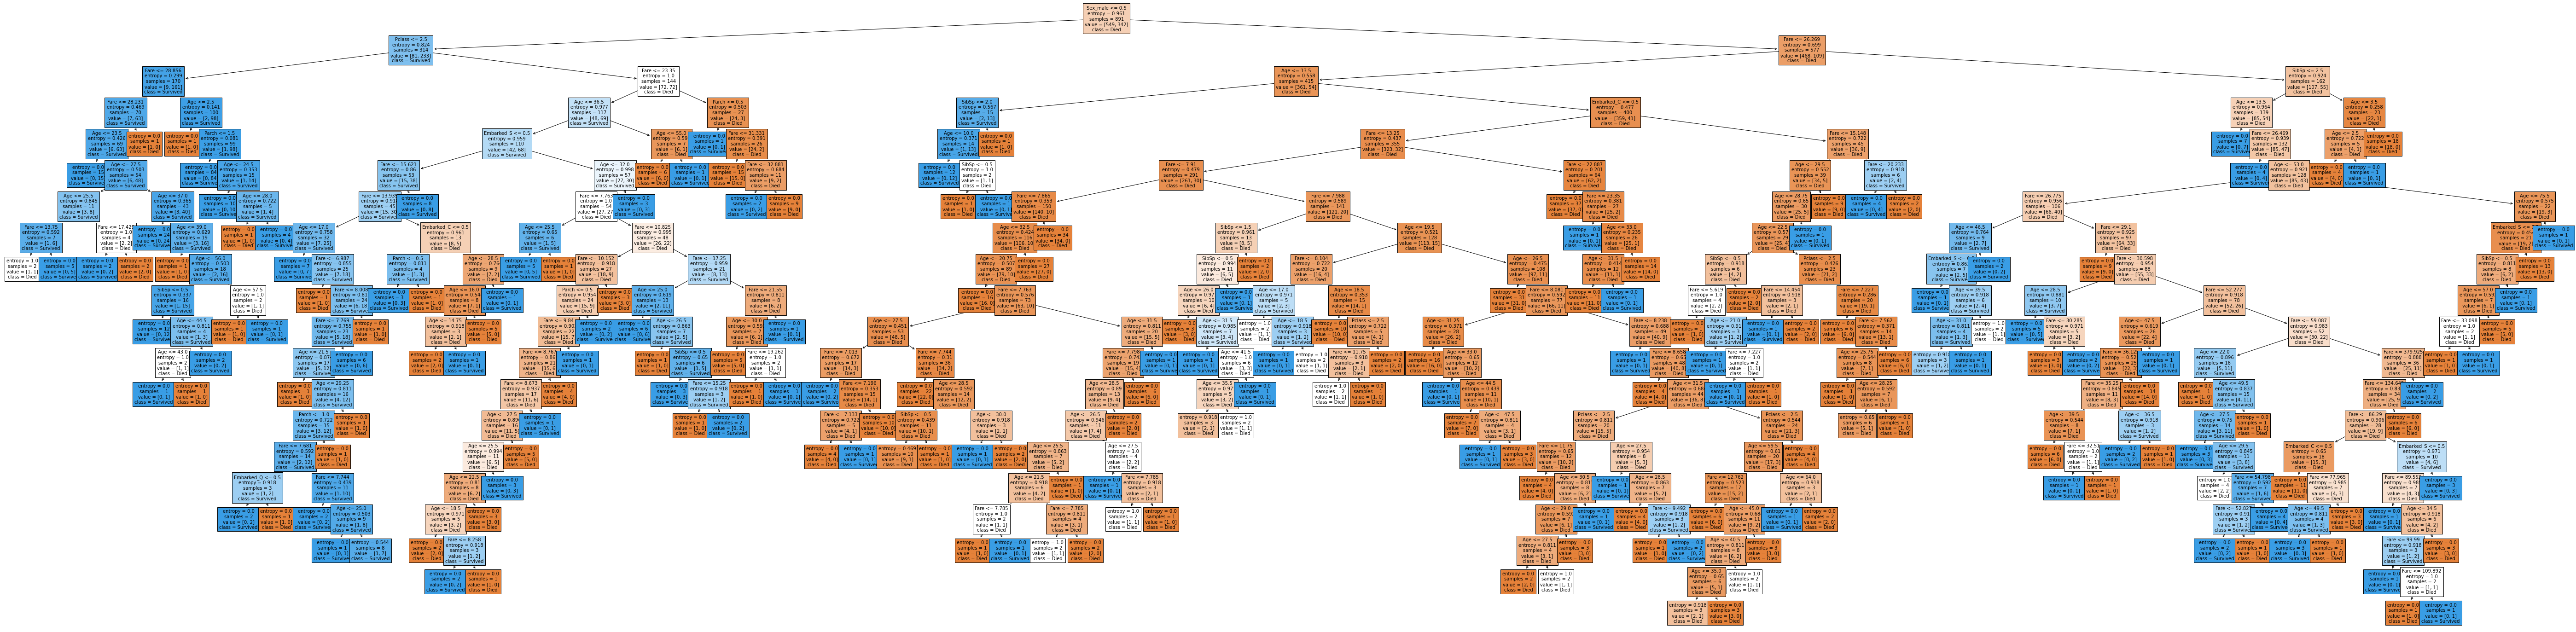

In [15]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), class_names=['Died','Survived'],filled=True)
plt.show()

## Let's solve the overfitting problem by adding constraints to the decision tree /Решим проблему переобучения добавив ограничения к решающему дереву

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

## GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
clf=tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

#### Заведем параметры которые мы будем проверять на кросс валидации

In [28]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,30)}

### Задаем параметры для проверки кросс валидации классификатора с использованием grid_search_cv

In [29]:
grid_search_cv_clf=GridSearchCV(clf, parameters, cv=5)

In [30]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

### проверяем лучшие параметры где значения accuracy будет оптимальным на кросс-валидационном множестве

In [31]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

### создаем лучший слассификатор с параметрами из grid_search_cv_clf

In [32]:
best_clf=grid_search_cv_clf.best_estimator_

In [34]:
best_clf.score(X_test,y_test)

0.7661016949152543

### Рассчитаем метрики

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [37]:
y_pred=best_clf.predict(X_test)

In [38]:
precision_score(y_test, y_pred)

0.7428571428571429

In [41]:
recall_score(y_test, y_pred)

0.65

In [43]:
f1_score(y_test, y_pred)

0.6933333333333334

In [44]:
y_predicted_prob = best_clf.predict_proba(X_test)

### отберем вторую колонку значений (положительных)

In [49]:
y_predicted_prob[:,1]

array([0.57142857, 0.5       , 0.13793103, 1.        , 1.        ,
       0.        , 0.85714286, 0.13793103, 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.08333333, 0.27272727,
       1.        , 0.        , 0.28571429, 0.03488372, 0.        ,
       0.03488372, 0.5       , 0.28571429, 0.13793103, 0.03488372,
       0.        , 0.5       , 0.5       , 0.        , 1.        ,
       0.13793103, 1.        , 0.22222222, 1.        , 0.13793103,
       0.57142857, 0.22222222, 0.85714286, 1.        , 0.03488372,
       0.        , 1.        , 0.03488372, 0.1627907 , 0.        ,
       0.13793103, 0.13793103, 0.03488372, 0.1627907 , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.5       , 0.        , 1.        , 0.28571429,
       0.1627907 , 1.        , 1.        , 0.        , 0.1627907 ,
       1.        , 0.        , 0.03488372, 0.33333333, 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.03488

### Видим что можно отсечь класс посередине

<AxesSubplot:>

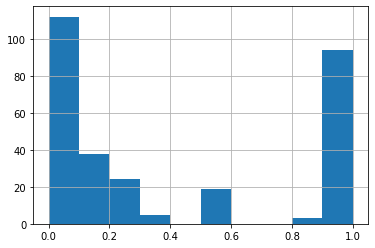

In [50]:
pd.Series(y_predicted_prob[:,1]).hist()

In [70]:
y_pred=np.where(y_predicted_prob[:,1]>0.1, 1, 0)

In [71]:
precision_score(y_test,y_pred)

0.546448087431694

In [72]:
recall_score(y_test,y_pred)

0.8333333333333334

## check how well the model works on the test and on the train /проверим насколько хорошо работает модель на тесте и на трейне

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
clf.score(X_train, y_train)

0.9798657718120806

In [19]:
clf.score(X_test, y_test)

0.7694915254237288

## Limiting the depth of the tree/Ограничиваем глубину дерева

In [20]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [22]:
clf.score(X_train, y_train)

0.8406040268456376

In [23]:
clf.score(X_test, y_test)

0.8067796610169492

## заведем массив параметров, также цикл по рассчету скоров

In [25]:
max_depth_values = range (1, 100) # глубина начинается с 1

In [28]:
scores_data=pd.DataFrame()

In [29]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    #временный датафрейм со значениями 
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    scores_data=scores_data.append(temp_score_data)

In [30]:
scores_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169
...,...,...,...
0,95,0.979866,0.766102
0,96,0.979866,0.776271
0,97,0.979866,0.779661
0,98,0.979866,0.769492


## build a graph, check the accuracy for the test and training sample, taking into account different depth values / построим график, проверим точность для тестовой и трейнинговой выборки при учете разных значений глубины 

### для совместного графика

<AxesSubplot:xlabel='max_depth'>

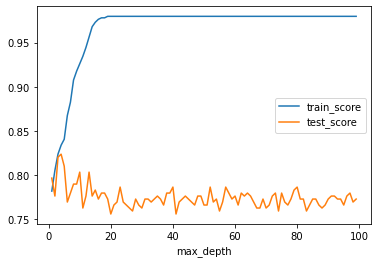

In [31]:
scores_data.plot(x='max_depth', y=['train_score', 'test_score'], legend = True)

### для более крупного вида графика test_scores

<AxesSubplot:xlabel='max_depth'>

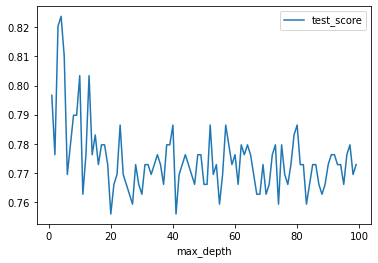

In [32]:
scores_data.plot(x='max_depth', y='test_score', legend = True)

анализ графика:
train score:
- растет с увеличением глубины дерева
- что не всегда ведет к нахождению общих закономерностей в исследуемых данных

test score:
- изначально невелик (модель еще не доучилась)
- на промежутке 3-5 score максимален (оптимальное состояние: закономерность с изученных данных переносится на новые)
- с дальнейшим увеличением глубины test score начинает падать (переход от недообученности к переобученности)

## Итого три уровня:

Но! all data = train + test = (train+val) + test


- Тренировочные - учим
- Валидационные - проверям как научили: если плохо - возвращаемся на шаг 1 с другими параметрами модели
- Предсказываем данные - здесь точность уже не проверишь, поэтому до этого шага доходит лучшая из построенных моделей

## Сross Validation / Кросс Валидация
Перебирая различную глубину дерева на один и тех же тестовых данных, мы не решаем проблему переобучения. Исправить ситуацию поможет  кросс-валидация (перекрестная проверка), разбивающая данные на тренировочную выборку для обучения, валидирующее множество для подбора оптимальных параметров и тестовые данные для финального замера точности.

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [122]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

1. Разделяем данные (X_train, y_train) на 5 частей, чтобы одну часть(всегда разную) использовать как тестовые данные, 
а остальные 4 как тренировочные. Получится, что каждый кусок данных будет использован и в обучении, и в тесте.
Для каждой модели усредним accuracy на подвыборках,
чтобы потом использовать как единый показатель точности для сравнения разных моделей.

In [123]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [124]:
mean_cross_val_score=cross_val_score(clf, X_train, y_train, cv=5).mean() #  вычисляем среднее по кросс валидации

In [125]:
mean_cross_val_score

0.7886274509803922

2.  Возвращаемся к работе с циклом для поиска оптимальной глубины и добавляем в scores_data среднюю точность на кросс-валидации. (чтобы не было путаницы в одном ноутбуке переименуем  scores_data в cross_val_scores_data)

In [126]:
cross_val_scores_data=pd.DataFrame() # создаем датафрейм

In [127]:
max_depth_values = range (1, 100) # глубина начинается с 1

In [128]:
for max_depth in max_depth_values:
    
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score=cross_val_score(clf, X_train, y_train, cv=5).mean() #  вычисляем среднее по кросс валидации
 
 #временный датафрейм со значениями 
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    cross_val_scores_data=cross_val_scores_data.append(temp_score_data)

In [129]:
cross_val_scores_data.head(50)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.803754
0,6,0.867450,0.769492,0.803754
0,7,0.882550,0.779661,0.800378
0,8,0.907718,0.800000,0.800364
0,9,0.917785,0.800000,0.796989
0,10,0.926174,0.800000,0.796989


3. В результате получим датафрейм с колонкой  max_depth и тремя  score, аналогично шагу 3 этого урока, используя функцию melt, преобразуем данные и построим график:

<AxesSubplot:xlabel='max_depth'>

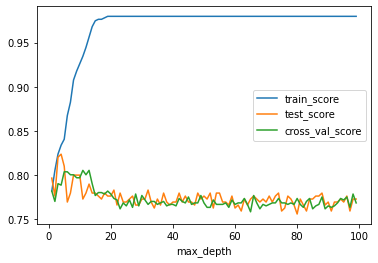

In [130]:
cross_val_scores_data.plot(x='max_depth', y=['train_score', 'test_score','cross_val_score'], legend = True)

! График у всех будет немного отличаться, потому что  cross_val_score рандомно разбивает данные на 5 частей!

4. Смотрим на зеленую линию (cross_val_score ). На графике ясно видно, что максимум приходится на глубину до 20. более точное значение максимальной глубины дерева поможет определить


In [133]:
max_score=cross_val_scores_data['cross_val_score'].max()

## вычисляем лучшее значение по глубине дерева и скор кросс валидации

In [132]:
cross_val_scores_data.loc[cross_val_scores_data['cross_val_score']== max_score,['max_depth','cross_val_score']]

,max_depth,cross_val_score
0,11,0.805392


In [134]:
cross_val_scores_data.sort_values('cross_val_score', ascending=False).groupby('max_depth').head(1)

,max_depth,train_score,test_score,cross_val_score
0,11,0.934564,0.772881,0.805392
0,13,0.956376,0.789831,0.805392
0,5,0.840604,0.810169,0.803754
0,6,0.867450,0.769492,0.803754
0,7,0.882550,0.779661,0.800378
...,...,...,...,...
0,85,0.979866,0.772881,0.761793
0,89,0.979866,0.766102,0.761793
0,68,0.979866,0.769492,0.761793
0,23,0.979866,0.779661,0.761793


5. Создаем классификатор, указывая соответствующее значение аргумента  max_depth. Обучаем на тренировочной выборке и замеряем точность на тестовой.

In [135]:
best_clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [136]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [137]:
best_clf.score(X_test, y_test)

0.7728813559322034

Тезисы, которые помогли разобраться в данном уроке, может кому тоже пригодится:

1. Перекрестная проверка не возвращает модель: кросс-валидация не является способом построения модели, которую можно применить к новым данным. При вызове cross_val_score строится несколько внутренних моделей, однако цель перекрестной проверки заключается только в том, чтобы оценить обобщающую способность данного алгоритма, обучив на определенном наборе данных. ("Введение в машинное обучение с помощью Python. Руководство для специалистов по работе с данными" А.Мюллер, С.Гвидо)

2. При k-fold кросс-валидации обучающая выборка разбивается на (k-1) подвыборок и следующий алгоритм выполняется k раз:
- Модель обучается с использованием (k-1) подвыборок в качестве тренировочных данных;
- Полученная модель проверяется на оставшейся одной подвыборке (которая служит тестовым набором для вычисления точности). 

3. Модель - это набор подготовленных данных (переменных) + метод (статистики, машинного обучения), подобранные для достижения цели исследования (проекта Data Science)
Процесс моделирования включает:
- Создание модели - планирование показателей (переменных) и выбор метода
- Тренировка модели
- Проверка адекватности и окончательный выбор модели
- Применение тренированной модели к незнакомым данным
Хорошая модель будет найдена (вероятно) только после многократного повторения первых 3-х шагов. ("Основы Data Science и Big Data. Python и наука о данных" Д.Силен, А.Мейсман, М.Али)

Таким образом (насколько я это понял),
1. Нужна хорошая модель, которая позволит достичь целей проекта, которую нужно обучить, протестировать, оценить и окончательно выбрать, после чего её можно будет применять "на производстве"
2. В данном уроке модель - это предобработанные данные Titanic + метод моделирования "Дерево решений", модель обучается методом fit() и тестируется 2-мя способами: score и cross_val_score
3. Метод cross_val_score() содержит (условно) процедуры обучения (fit) и проверки (score) , но он не может возвращать модель, которую можно применять к новым данным.



## Задача !!
Убедимся в том, что всё так происходит на самом деле. 
- Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. 
- Целевой переменной при обучении является переменная species. 
- При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. 
- Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

### Важно 
- задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)

np.random.seed(0)

my_awesome_tree = DecisionTreeClassifier(...)

или

my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)

- если при чтении файлов не указать index_col=0, то данные ломаются.



### 1. Подключаем необходимые библиотеки:

In [138]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ssn
%matplotlib inline

### 2. Подготовка баз данных.


In [181]:
df_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
df_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv',  index_col=0)

In [182]:
df_train.head(5)

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [183]:
df_test.head(5)

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


#### Проверяем пропущенные значения, размер датасетов

In [184]:
df_train.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [185]:
df_train.shape

(100, 5)

In [186]:
df_test.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [187]:
df_test.shape

(50, 5)

#### Удаляем ненужные столбцы:
- X_train = удаляем ненужные столбцы из df_train и тот который будем предсказывать species
- X_test = удаляем ненужные столбцы из df_train и тот который будем предсказывать species
- y_train = вводим переменную которую будем предстказывать species из df_train
- y_test = вводим переменную которую будем предстказывать species из df_test

In [188]:
X_train=df_train.drop(['species'], axis = 1)

In [193]:
X_train.head(5)

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [190]:
X_test=df_test.drop(['species'], axis = 1)

In [192]:
X_test.head(5)

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
70,5.9,3.2,4.8,1.8
138,6.0,3.0,4.8,1.8
59,5.2,2.7,3.9,1.4
44,5.1,3.8,1.9,0.4


In [196]:
y_train=df_train.species

In [197]:
y_test = df_test.species

### 3.Обучение

#### Добавляем согласно условию:

In [215]:
np.random.seed(0)
rs = np.random.seed(0)

Определяем новую базу:

In [216]:
scores_data = pd.DataFrame()

Определяем переменную max_depth_values:

In [217]:
max_depth_values = range (1, 100) # глубина начинается с 1

пишем цикл для поиска оптимальной глубины и сохраняем полученные данные в новую базу:

In [218]:
for i in max_depth_values:

    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    #временный датафрейм со значениями 
    temp_score_data = pd.DataFrame({'max_depth': [i], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    scores_data=scores_data.append(temp_score_data)

In [219]:
scores_data

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
...,...,...,...
0,95,1.00,0.92
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.94


Проверка максимальных значений тест скора и глубины дерева

In [222]:
scores_data.sort_values(['test_score'],ascending=False)

,max_depth,train_score,test_score
0,83,1.0,0.94
0,38,1.0,0.94
0,26,1.0,0.94
0,86,1.0,0.94
0,84,1.0,0.94
...,...,...,...
0,42,1.0,0.92
0,41,1.0,0.92
0,40,1.0,0.92
0,39,1.0,0.92


Изобразить на графике зависимость точности от глубины, и сделать это двумя линиями (train и test), выбираем такую функцию pandas (https://seaborn.pydata.org/generated/seaborn.lineplot.html), которой можем дать только один x и y:

<AxesSubplot:xlabel='max_depth'>

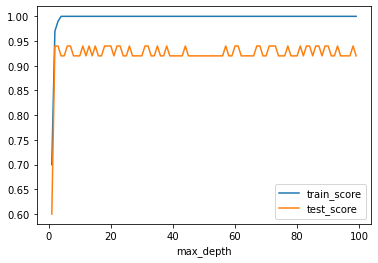

In [220]:
scores_data.plot(x='max_depth', y=['train_score', 'test_score'], legend = True)

В сухом остатке - тезисы:

1) точность (score) как процент правильных ответов не хорошая и не верная метрика качества модели. Например, в ситуации, когда только 10% выживших, любая модель-классификатор , которая бы всем (этот говорящий пример назовем "чтоб все сдохли") предсказывала, что они не выживут, давала бы точность 90% , так как 10% выживших здесь, по сути, погрешность, равная доле неправильно классифицированных.

2) точность хорошо работает на сбалансированных выборках, т.е. когда равномерное распределение между классами

3) получается, точность как доля верно классифицированных может быть разной для разных классов

4) двигаемся дальше - узнаем новые методы оценки качества модели (кто-то об этом уже подумал до нас).


### Задача. Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

In [228]:
df= pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [229]:
df.head(5)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [232]:
df.shape

(1000, 6)

In [235]:
df.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [236]:
X_train = df.drop(['Вид'], axis = 1)

In [237]:
X_train.head(5)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [238]:
y_train=df['Вид']

In [239]:
y_train

0      собачка
1      собачка
2      собачка
3      собачка
4      собачка
        ...   
995      котик
996      котик
997      котик
998      котик
999      котик
Name: Вид, Length: 1000, dtype: object

In [252]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [253]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [256]:
clf.score(X_train, y_train)

1.0

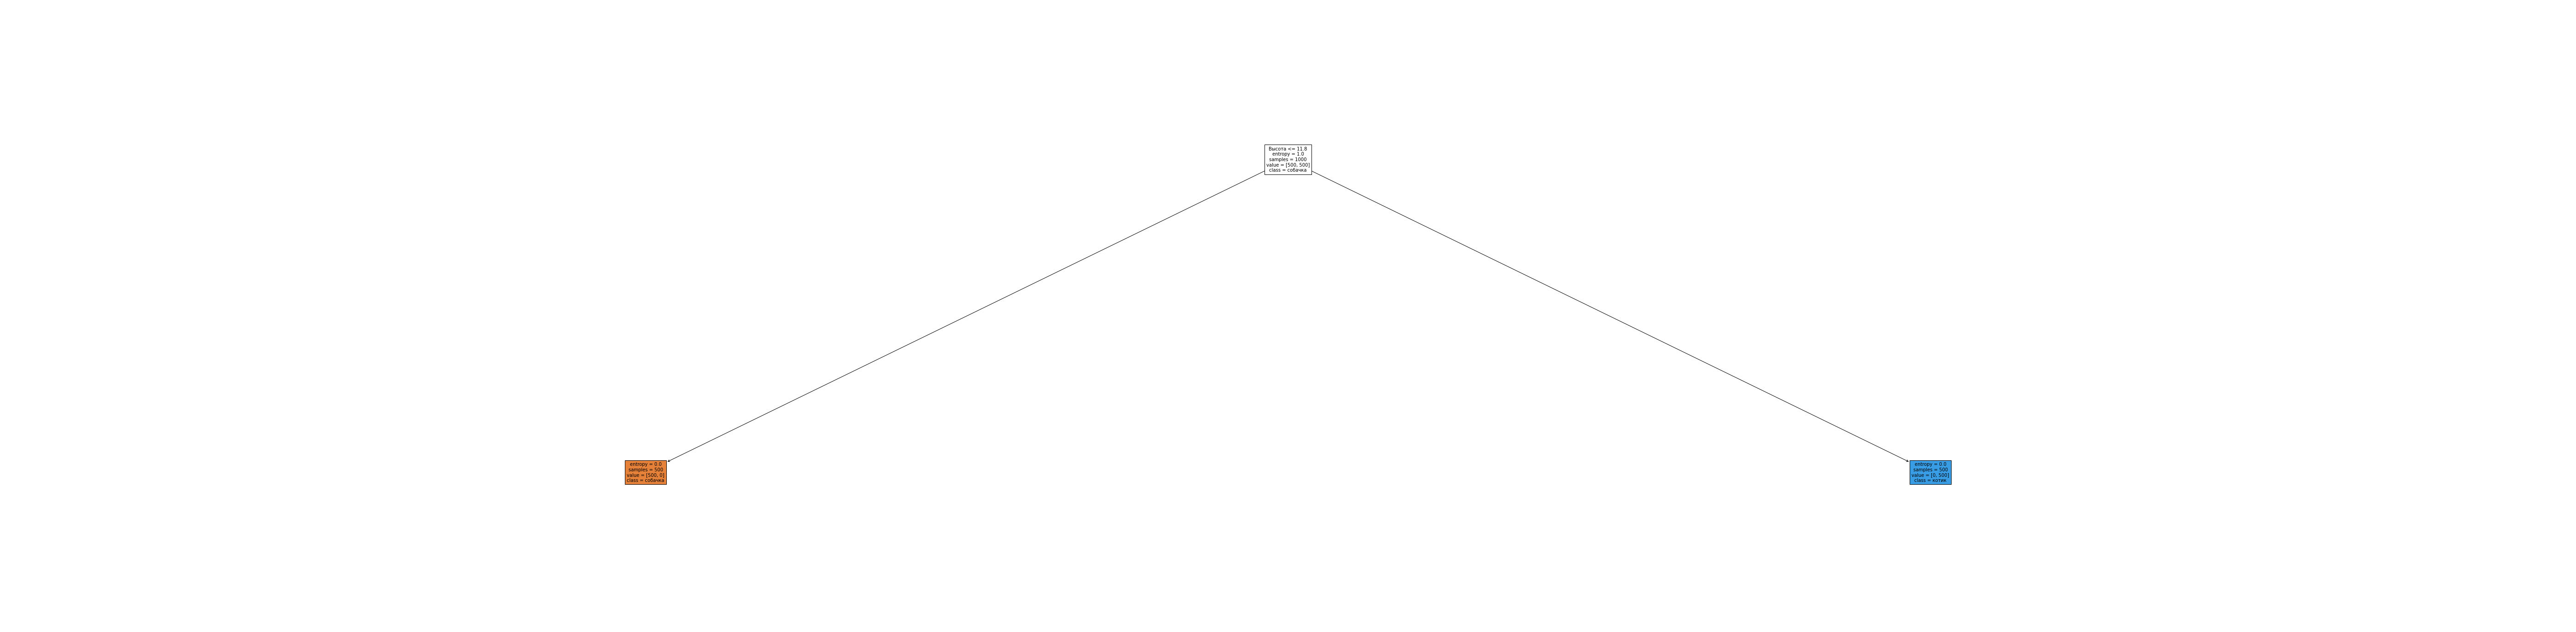

In [274]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X_train), class_names=['собачка','котик'],filled=True)
plt.show()

In [261]:
clf.predict(X_train)

array(['собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 

In [266]:
df_test=pd.read_json('/Users/mkuzminetc/Downloads/dataset_209691_15 (2).txt')

In [267]:
df_test.head(5)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,32,38.4,1,1,0
1,24,28.8,1,1,0
2,27,32.4,1,1,0
3,21,25.2,1,1,0
4,29,34.8,1,1,0


In [272]:
result=clf.predict(df_test)

In [273]:
pd.Series(result)[result == 'собачка'].count()

59

In [ ]:
scores_data.plot(x='max_depth', y=['train_score', 'test_score'], legend = True)

Прототип решения:


![title](https://ucarecdn.com/3d6bfe11-503d-496e-8e01-27a0f7de8269/)





### 1.  Подключаем библиотеки

         from sklearn import tree

    import pandas as pd

    import numpy as nm

    import matplotlib.pyplot as plt

    import seaborn as sns

    from sklearn.model_selecion import train_test_split

 

### 2. Скачиваем выборку:

df_tr = pd.read_csv(r'..............')

- выводим наименование столбцов:

df_tr.columns

 

### 3. Обработка.

- Удаляем целевой столбец:

X = df_tr.drop(['Вид'], axis=1)

y = df_tr['Вид']

- Разбиваем выборку на тренировочную и тестовую:

X_train, X_test, y_train, y_test = train_test_split(..................)

### 4. Обучение.

clf = tree.DecisionTreeClassifier(...............')

clf.fit(........)

 

### 5. Определение количество собачек в тестовой выборке

- скачиваем

df_ts = pd.read_json(r'.........')

- проверяем соответствие столбцов тестовой и тренировочной выборки

df_ts[:2]

df_tr[:2]

- если порядок не совпадает, то приводим к единому

     текущий порядок столбцов [b, c, d, a]     X_ts = df_ts[['a', 'b', 'c', 'd']]

 

result = clf.predict(X_ts)

pd.Series(result)[result == 'собачка'].count()